In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
male_surv=df[(df['Survived']==1) & (df['Sex']=='male')].shape[0]
female_surv=df[(df['Survived']==1) & (df['Sex']=='female')].shape[0]
total_surv=df[df['Survived']==1].shape[0]

In [6]:
#percentage male survived
(male_surv/total_surv)*100

31.871345029239766

In [7]:
#percentage female survived
(female_surv/total_surv)*100

68.12865497076024

In [8]:
df[df.Pclass==1].Age.mean()

38.233440860215055

In [9]:
df[df.Pclass==2].Age.mean()

29.87763005780347

In [10]:
df[df.Pclass==3].Age.mean()

25.14061971830986

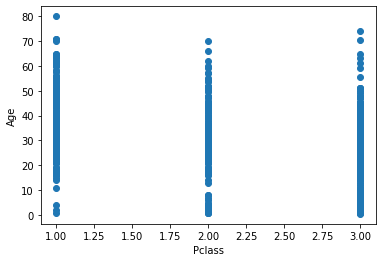

In [11]:
plt.scatter(df.Pclass,df.Age)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

<BarContainer object of 891 artists>

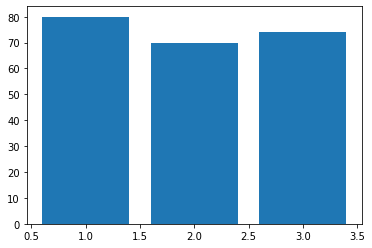

In [12]:
plt.bar(df.Pclass,df.Age)

In [13]:
df.groupby(by=df.Pclass, group_keys=False).apply(lambda x: df.Age).dropna(axis=1)

Age,0,1,2,3,4,6,7,8,9,10,...,880,881,882,883,884,885,886,887,889,890
Pclass,,,,,,,,,,,,,,,,,,,,,
1,22.0,38.0,26.0,35.0,35.0,54.0,2.0,27.0,14.0,4.0,...,25.0,33.0,22.0,28.0,25.0,39.0,27.0,19.0,26.0,32.0
2,22.0,38.0,26.0,35.0,35.0,54.0,2.0,27.0,14.0,4.0,...,25.0,33.0,22.0,28.0,25.0,39.0,27.0,19.0,26.0,32.0
3,22.0,38.0,26.0,35.0,35.0,54.0,2.0,27.0,14.0,4.0,...,25.0,33.0,22.0,28.0,25.0,39.0,27.0,19.0,26.0,32.0


In [14]:
df.Survived.corr(df.Pclass)

-0.3384810359610148

In [15]:
#very low correlation

In [16]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [17]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:>

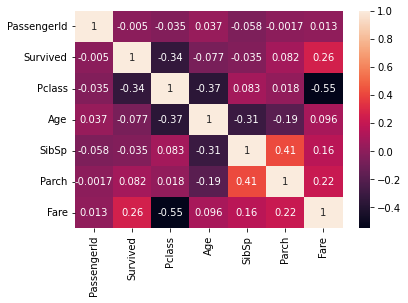

In [19]:
corr = df.corr()
sns.heatmap(corr,annot=True)

In [20]:
#looking at the row of survived, fare and pclass are correlated lowly and rest are not correlated

In [21]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [35]:
t=TransactionEncoder()
df1=df[df.Survived==1]
temp = t.fit(df1).transform(df1)
df2 = pd.DataFrame(temp)
df2

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,False,False,False,False,True,False,True,False,False,True,...,False,False,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,True,False
2,False,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
338,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
339,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
temp=apriori(df2, min_support=0.01,use_colnames=True)
temp

,support,itemsets
0,0.020468,(9)
1,0.023392,(13)
2,0.011696,(16)
3,0.014620,(22)
4,0.011696,"(9, 13)"
5,0.011696,"(9, 22)"
6,0.011696,"(13, 22)"


In [45]:
rules=association_rules(temp,metric='confidence',min_threshold=0)
rules.sort_values(by=['confidence'],ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(22),(9),0.014620,0.020468,0.011696,0.800000,39.085714,0.011397,4.897661
5,(22),(13),0.014620,0.023392,0.011696,0.800000,34.200000,0.011354,4.883041
0,(9),(13),0.020468,0.023392,0.011696,0.571429,24.428571,0.011217,2.278752
2,(9),(22),0.020468,0.014620,0.011696,0.571429,39.085714,0.011397,2.299220
1,(13),(9),0.023392,0.020468,0.011696,0.500000,24.428571,0.011217,1.959064
4,(13),(22),0.023392,0.014620,0.011696,0.500000,34.200000,0.011354,1.970760
